# Spam detection


Author:


In [1]:
#reading the data
import pandas as pd
data = pd.read_csv('spam.csv', encoding='latin-1')
data.columns = ['label', 'messages']
data.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [2]:
data.head(10)

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Exploratory data analysis

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

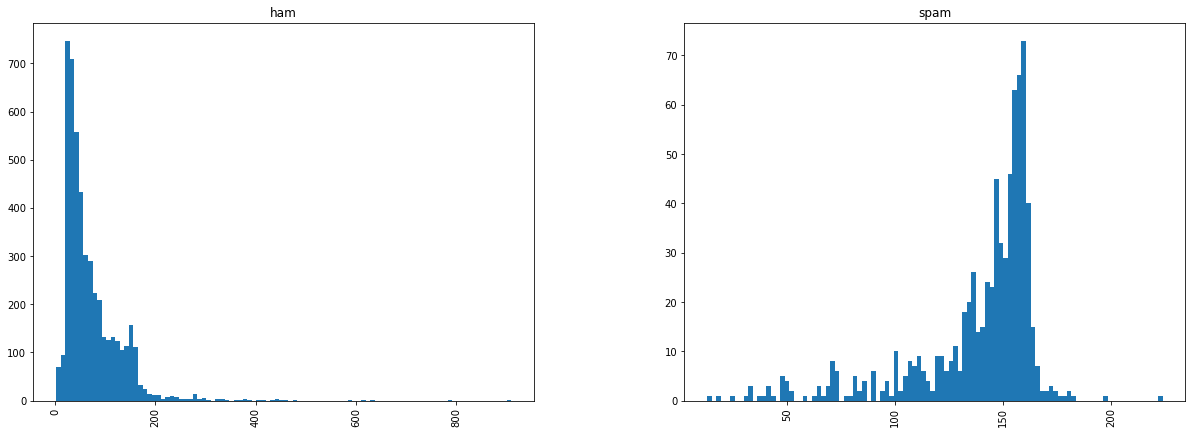

In [3]:
data["length"] = data["messages"].apply(len)
data.sort_values(by='length', ascending=False)
data.hist(column='length', by='label', bins=100, figsize=(20,7))

##### The above histogram tells us that spam messages generally has more length. 

In [4]:
import string
from nltk.corpus import stopwords

#for message in data["messages"]:
def clean_message(message):
    sentence = []
    for c in message:
        if c not in string.punctuation:
            sentence.append(c)
    sentence = ''.join(sentence)
    # all the punctuation marks from the messages are removed here
    #now we want to remove the stopwords which will increase the redundancy in the dataframe and
    #will not affect the classifier.
    sentence=sentence.lower()
    word_list = list(sentence.split(" "))
    for word in word_list:
        if word in stopwords.words('english'):
            word_list.remove(word)
    sentence=" ".join(word_list)
    return sentence
    #data.loc[data['messages'] == message, 'messages'] = sentence

#data.head(10)

In [18]:
data['messages'].head(5).apply(clean_message)

0    go jurong point crazy available in bugis n gre...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: messages, dtype: object

In [9]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorization = CountVectorizer(analyzer = clean_message )
X = vectorization.fit(data['messages'])


X_transform = X.transform([data['messages']])
print(X_transform)

  (0, 0)	2
  (0, 1)	59529
  (0, 2)	3186
  (0, 3)	1745
  (0, 4)	1699
  (0, 5)	851
  (0, 6)	1042
  (0, 7)	1067
  (0, 8)	801
  (0, 9)	856
  (0, 10)	1310
  (0, 11)	659
  (0, 12)	20789
  (0, 13)	4268
  (0, 14)	8550
  (0, 15)	9671
  (0, 16)	30527
  (0, 17)	3798
  (0, 18)	8152
  (0, 19)	10276
  (0, 20)	17639
  (0, 21)	685
  (0, 22)	4533
  (0, 23)	14746
  (0, 24)	8914
  :	:
  (0, 37)	500
  (0, 38)	69
  (0, 39)	1
  (0, 40)	1
  (0, 41)	328
  (0, 42)	3
  (0, 43)	3
  (0, 44)	2
  (0, 45)	1
  (0, 46)	1
  (0, 47)	2
  (0, 48)	1
  (0, 49)	1
  (0, 50)	379
  (0, 51)	1
  (0, 52)	180
  (0, 53)	55
  (0, 54)	3
  (0, 55)	11
  (0, 56)	6
  (0, 57)	2
  (0, 58)	37
  (0, 59)	1
  (0, 60)	37
  (0, 61)	69


In [20]:
# TF-IDF
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
tfidf_transformer = TfidfTransformer().fit(X_transform)
X_tfidf = tfidf_transformer.transform(X_transform)
print(X_tfidf.shape)



(1, 62)
(1, 62)


In [21]:
# Classification Model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['messages'], test_size=0.30, random_state = 50)    
clf = SVC(kernel='linear').fit(X_train, y_train)

# Test model
predictions = clf.predict(X_test)
print('predicted', predictions)

ValueError: Found input variables with inconsistent numbers of samples: [1, 5572]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))